In [3]:
import pandas as pd
import csv
import pyvis
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import haversine as hs
import folium

In [4]:
df1 = pd.read_csv(r"C:\Data Analyst\HOHO\bus_route.csv")
df1.head()

,gid,id,routecir,route_no,route_id,length,geom,source,target,array_route_id
0,5,1,"Green, Yellow","3,4","G , Y",413.295021,0102000020E61000001D000000E93290C2D03D5340081C...,9,10,"{G , Y}"
1,17,2,Green,3,G,226.911852,0102000020E6100000130000004C7ACECC023D53401FBE...,23,24,{G}
2,26,4,"Green, Yellow","3,4","G , Y",13.292066,0102000020E61000000200000092110654EE3D5340A594...,33,17,"{G , Y}"
3,35,5,Yellow,4,Y,230.556235,0102000020E61000000B000000775E4C8E163C53407851...,43,44,{Y}
4,45,2,"Red, Blue, Magenta, Orange","1,2,6,7","R , B , M , O",196.627715,0102000020E6100000060000005B22BCE2CE3C534081EE...,58,59,"{R , B , M , O}"


In [5]:
busroute = df1.drop(["gid","id","geom"], axis = 1)
busroute

,routecir,route_no,route_id,length,source,target,array_route_id
0,"Green, Yellow","3,4","G , Y",413.295021,9,10,"{G , Y}"
1,Green,3,G,226.911852,23,24,{G}
2,"Green, Yellow","3,4","G , Y",13.292066,33,17,"{G , Y}"
3,Yellow,4,Y,230.556235,43,44,{Y}
4,"Red, Blue, Magenta, Orange","1,2,6,7","R , B , M , O",196.627715,58,59,"{R , B , M , O}"
...,...,...,...,...,...,...,...
190,Orange,7,O,330.724257,155,156,{O}
191,"Red , Blue , Violet","1,2,5","R , B , V",8.678829,25,157,"{R , B , V}"
192,"Red, Blue, Violet, Orange","1,2,5,7","R , B , V , O",45.769317,157,96,"{R , B , V , O}"
193,"Red, Blue, Violet, Orange","1,2,5,7","R , B , V , O",54.246858,97,66,"{R , B , V , O}"


###### Extract the source and target (Numpy array)

In [6]:
ftCol = busroute.iloc[:, 4:6].values
print(ftCol)
len(ftCol)
type(ftCol)

[[  9  10]
 [ 23  24]
 [ 33  17]
 [ 43  44]
 [ 58  59]
 [ 57  58]
 [141 142]
 [148 149]
 [ 11  12]
 [ 13  14]
 [104 105]
 [  1   2]
 [  3   4]
 [174 178]
 [127 128]
 [  5   6]
 [  7   8]
 [159 160]
 [158 181]
 [181 159]
 [182 183]
 [160 182]
 [183  57]
 [ 92 137]
 [ 61  50]
 [ 67  75]
 [184  71]
 [144 184]
 [103 104]
 [ 15  16]
 [ 17   9]
 [ 10  18]
 [ 18   5]
 [  6  19]
 [ 19  20]
 [ 20  21]
 [ 21  22]
 [ 87  88]
 [ 22  23]
 [ 25  26]
 [ 26  27]
 [ 27  28]
 [ 28   7]
 [105 106]
 [  8  29]
 [ 29  30]
 [ 14  31]
 [ 31  32]
 [ 12  33]
 [ 18  34]
 [ 35  36]
 [ 37  38]
 [ 62  63]
 [ 38   3]
 [  4  39]
 [102 103]
 [ 39  40]
 [ 41  42]
 [ 44  45]
 [ 45  46]
 [ 47   1]
 [ 48  49]
 [  2  48]
 [ 50  51]
 [ 52  53]
 [ 54  55]
 [ 56  57]
 [ 59  55]
 [ 60  61]
 [ 63  64]
 [ 65  25]
 [ 66  67]
 [ 67  68]
 [ 68  69]
 [ 69  52]
 [ 53  54]
 [ 70  71]
 [ 72  73]
 [ 73  74]
 [ 74  62]
 [ 75  76]
 [ 76  77]
 [ 77  78]
 [ 78  79]
 [ 79  80]
 [ 81  82]
 [ 83  84]
 [ 84  85]
 [ 85  86]
 [ 51  87]
 [ 88  89]

numpy.ndarray

### Convert the numpy array to dataframe 

In [7]:
dfGraph = pd.DataFrame(ftCol, columns = ['source','target'])
dfGraph

,source,target
0,9,10
1,23,24
2,33,17
3,43,44
4,58,59
...,...,...
190,155,156
191,25,157
192,157,96
193,97,66


### Check for unique characters

In [8]:
G = nx.from_pandas_edgelist(dfGraph, source='source', target='target')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 184
No of connections: 195


### Visualization

In [9]:
# create vis network
net = Network(notebook=True, width=1000, height=600)
# load the networkx graph
net.from_nx(G)
# show
net.show("example.html")

### source and target to list

In [10]:
source = dfGraph['source'].tolist()
source

[9,
 23,
 33,
 43,
 58,
 57,
 141,
 148,
 11,
 13,
 104,
 1,
 3,
 174,
 127,
 5,
 7,
 159,
 158,
 181,
 182,
 160,
 183,
 92,
 61,
 67,
 184,
 144,
 103,
 15,
 17,
 10,
 18,
 6,
 19,
 20,
 21,
 87,
 22,
 25,
 26,
 27,
 28,
 105,
 8,
 29,
 14,
 31,
 12,
 18,
 35,
 37,
 62,
 38,
 4,
 102,
 39,
 41,
 44,
 45,
 47,
 48,
 2,
 50,
 52,
 54,
 56,
 59,
 60,
 63,
 65,
 66,
 67,
 68,
 69,
 53,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 83,
 84,
 85,
 51,
 88,
 101,
 90,
 91,
 92,
 50,
 86,
 93,
 94,
 64,
 95,
 96,
 98,
 36,
 99,
 55,
 33,
 100,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 66,
 94,
 122,
 123,
 125,
 126,
 128,
 129,
 130,
 132,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 144,
 146,
 149,
 150,
 151,
 40,
 154,
 156,
 143,
 89,
 80,
 82,
 51,
 144,
 24,
 30,
 32,
 16,
 49,
 109,
 162,
 34,
 40,
 42,
 46,
 83,
 163,
 121,
 124,
 131,
 164,
 165,
 166,
 167,
 168,
 169,
 133,
 136,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 120,


In [11]:
target = dfGraph['target'].tolist()
target

[10,
 24,
 17,
 44,
 59,
 58,
 142,
 149,
 12,
 14,
 105,
 2,
 4,
 178,
 128,
 6,
 8,
 160,
 181,
 159,
 183,
 182,
 57,
 137,
 50,
 75,
 71,
 184,
 104,
 16,
 9,
 18,
 5,
 19,
 20,
 21,
 22,
 88,
 23,
 26,
 27,
 28,
 7,
 106,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 38,
 63,
 3,
 39,
 103,
 40,
 42,
 45,
 46,
 1,
 49,
 48,
 51,
 53,
 55,
 57,
 55,
 61,
 64,
 25,
 67,
 68,
 69,
 52,
 54,
 71,
 73,
 74,
 62,
 76,
 77,
 78,
 79,
 80,
 82,
 84,
 85,
 86,
 87,
 89,
 102,
 91,
 62,
 56,
 92,
 93,
 60,
 93,
 95,
 65,
 97,
 37,
 98,
 35,
 94,
 100,
 101,
 107,
 108,
 109,
 111,
 112,
 89,
 114,
 115,
 116,
 32,
 118,
 120,
 158,
 121,
 123,
 124,
 126,
 127,
 129,
 130,
 131,
 133,
 135,
 136,
 138,
 139,
 140,
 141,
 143,
 145,
 147,
 150,
 151,
 152,
 153,
 155,
 157,
 71,
 90,
 81,
 83,
 70,
 161,
 95,
 13,
 15,
 49,
 162,
 81,
 11,
 99,
 41,
 43,
 47,
 110,
 113,
 122,
 125,
 164,
 165,
 166,
 167,
 168,
 169,
 132,
 134,
 170,
 171,
 172,
 173,
 174,
 56,
 175,
 176,
 179,
 119,
 177,
 180,
 

### Possible path between two nodes

In [12]:
# Python program to print all paths from a source to destination.

from collections import defaultdict

# This class represents a directed graph
# using adjacency list representation
class Graph:

    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices

        # default dictionary to store graph
        self.graph = defaultdict(list)

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
    
    def printAllPathsUtil(self, u, d, visited, path):

        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)

        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            print (path)
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path)

        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False


    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d):

        # Mark all the vertices as not visited
        visited =[False]*(self.V)

        # Create an array to store paths
        path = []

        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path)

g = Graph(184)
for (i , j) in zip (source, target):
    g.addEdge(i , j)

s = int(input())
d = int(input())
print ("Following are all different paths from % d to % d :" %(s, d))
g.printAllPaths(s, d)



9
10
Following are all different paths from  9 to  10 :
[9, 10]


### Distance between two stops

In [13]:
df2 = pd.read_csv(r"C:\Data Analyst\HOHO\tbl_bus_stops.csv")
df3 = df2.set_index('stop_id')
df3

,stop_no,stop_name,stop_circle,stop_location,remarks,latitude,longitude,accuracy,is_geotagged,updated_user_id,updated_timestamp
stop_id,,,,,,,,,,,
231,103 A,Valiyashala - Shivashetram,M,In front of Sri Mahadeva Kshetram,NIL,8.484267,76.960225,1.80,True,22,51:11.3
9,109 B,Ambalathumukku,O,2,NIL,8.493782,76.936227,2.05,True,20,18:52.2
74,111 A,Kannammoola,M,1,NIL,8.503122,76.931760,2.20,True,20,31:17.8
41,1:00 AM,East Fort - North Bus Stand,M,NaN,NIL,8.483422,76.947503,19.11,True,19,26:01.8
18,100 B,Attakulangara Road,M,Opposite to SKP timbers,NIL,8.479653,76.952458,2.03,True,20,24:05.6
...,...,...,...,...,...,...,...,...,...,...,...
252,01 D,East Fort - Opposite North Bus Stand,"R, B, M, O",Drop point,NIL,8.483514,76.947795,2.08,True,22,56:32.1
253,01 E,East Fort - Karimpanal Arcade,"M, O",NaN,NIL,8.481448,76.947265,1.66,True,22,00:45.0
254,04 D,Statue - AG's Office,"R, V",opposite Indian Oil pump,NIL,8.499675,76.948952,1.60,True,22,46:43.4


In [14]:
busstop_loc = df3.drop(["stop_no","stop_name","stop_circle" ,"stop_location" ,"remarks" ,"accuracy" ,"is_geotagged" ,"updated_user_id" , "updated_timestamp" ], axis = 1)
busstop_loc

,latitude,longitude
stop_id,,
231,8.484267,76.960225
9,8.493782,76.936227
74,8.503122,76.931760
41,8.483422,76.947503
18,8.479653,76.952458
...,...,...
252,8.483514,76.947795
253,8.481448,76.947265
254,8.499675,76.948952


In [15]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
list1 = []
# driver code
#source = int(input())
#target = int(input())

for (m , l) in zip (source, target):
    stop_id = m
    lat1 = busstop_loc.at[stop_id,'latitude']
    lon1 = busstop_loc.at[stop_id,'longitude']

#print(loc1)
    stop_id = l
    lat2 = busstop_loc.at[stop_id,'latitude']
    lon2 = busstop_loc.at[stop_id,'longitude']

#lat1 = 53.32055555555556
#lat2 = 53.31861111111111
#lon1 = -1.7297222222222221
#lon2 = -1.6997222222222223
    distance_final = distance(lat1, lat2, lon1, lon2)
    list1.append(distance_final)
    print(distance_final,'K.M')

1.9539289520105476 K.M
0.09618461322309045 K.M
2.812662274137389 K.M
0.388816588605552 K.M
0.019091861094140024 K.M
2.4307737402647716 K.M
0.016308778169593984 K.M
0.10513655438982861 K.M
0.027774173505554767 K.M
0.0835970191840751 K.M
0.01225052724274128 K.M
0.054762535059779946 K.M
38.56415334411951 K.M
2.729345230122474 K.M
0.1912018153087617 K.M
0.20645988503726811 K.M
4.9466276615066365 K.M
5.999640881383495 K.M
1.6940164466381846 K.M
1.6843064655524025 K.M
1.68467368639763 K.M
5.039715469754231 K.M
5.798420169812375 K.M
1.9313852504365965 K.M
5.10136689619968 K.M
3.996846492271831 K.M
5.049093050168366 K.M
3.782117078852164 K.M
1.6270347025693719 K.M
0.08922998714985785 K.M
2.3912639813009977 K.M
3.555148213984463 K.M
5.862731653817144 K.M
4.874646158437783 K.M
0.12801329939147682 K.M
0.20784656108428126 K.M
1.4142839354452859 K.M
3.7307116755982084 K.M
0.10472655165186119 K.M
2.9901728369339264 K.M
0.04396925257414871 K.M
4.203360726770185 K.M
5.199864690550306 K.M
0.76997429645

In [16]:
dfGraph['Distance'] = list1
dfGraph

,source,target,Distance
0,9,10,1.953929
1,23,24,0.096185
2,33,17,2.812662
3,43,44,0.388817
4,58,59,0.019092
...,...,...,...
190,155,156,2.991660
191,25,157,2.945860
192,157,96,5.291867
193,97,66,4.641909


In [19]:
# Creating the map and adding points to it
map = folium.Map(location=[df3.latitude.mean(), df3.longitude.mean()], zoom_start=14, control_scale=True)

for index, location_info in df3.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["stop_name"]).add_to(map)

In [20]:
map

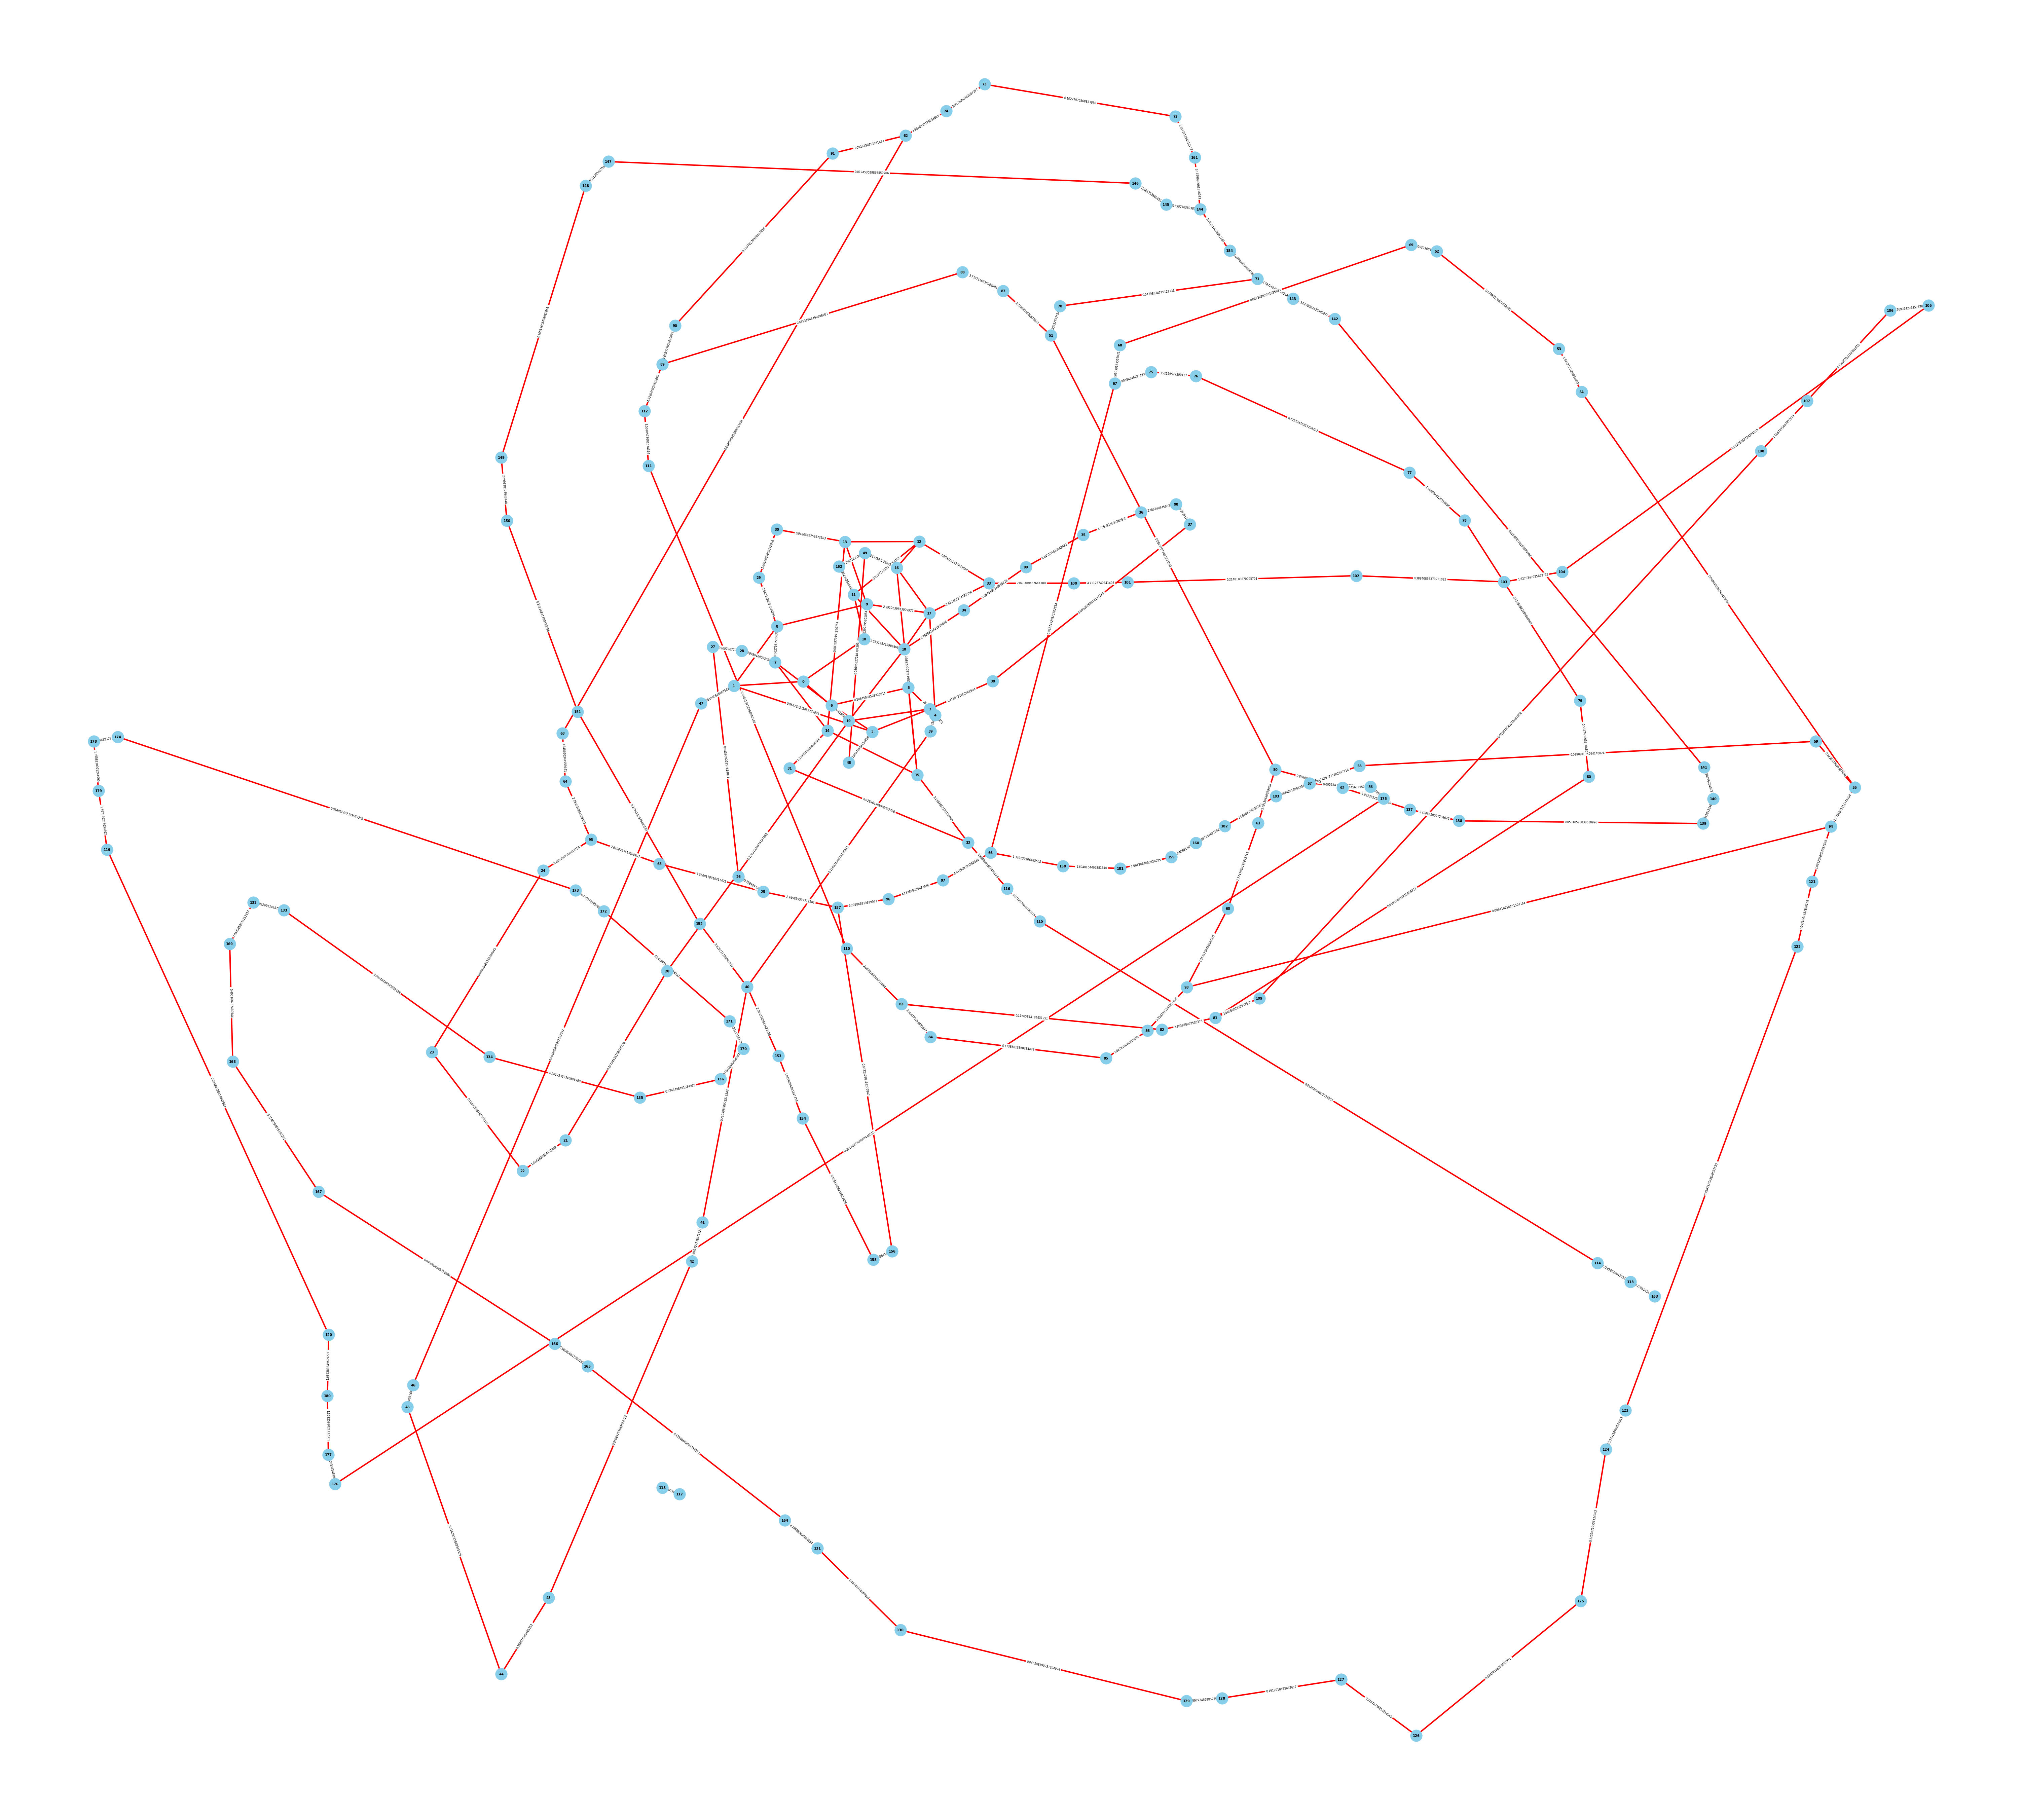

In [21]:
G = nx.dodecahedral_graph()
 
# Using add_edge
for (i , j, k) in zip (source, target, list1):
    G.add_edge(i , j, weight = k)



pos=nx.spring_layout(G)
fig = plt.figure(1, figsize=(100, 90), dpi=60)

nx.draw(G, pos,node_size=1800, with_labels=True,node_color="skyblue", font_weight='bold',width=5, edge_color="red", style="solid",arrows=True)
edge_weight = nx.get_edge_attributes(G,'weight')
bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]} 
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight,font_size = 10, font_weight = 'normal')


plt.show()